# Binary Classification Model for German Credit Risks Using Python Take 2
### David Lowe
### September 26, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. https://machinelearningmastery.com/

SUMMARY: The purpose of this project is to construct a prediction model using various machine learning algorithms and to document the end-to-end steps using a template. The German Credit Risks Dataset is a binary-class classification situation where we are trying to predict one of the two possible outcomes.

INTRODUCTION: This dataset contains 1,000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes on credit risk by a German bank. Each person is classified as good or bad credit risks according to the set of attributes.

Because the case study also stipulated that it is worse to classify a customer as good when they are bad (weight of 5), than it is to classify a customer as bad when they are good (weight of 1). For this iteration, the script focuses on tuning various machine learning algorithms and identify the algorithm that can produce the best cost-and-accuracy tradeoffs.

CONCLUSION: From the previous iteration Take 1, the baseline performance of the eight algorithms achieved an average accuracy of 71.80%. Three algorithms (Logistic Regression, Extra Trees, and Stochastic Gradient Boosting) achieved the top three accuracy scores after the first round of modeling. After a series of tuning trials, Stochastic Gradient Boosting turned in the top result using the training data. It achieved an average accuracy of 76.14%. Using the optimized tuning parameter available, the Stochastic Gradient Boosting algorithm processed the validation dataset with an accuracy of 77.66%, which was slightly better than the accuracy from the training data.

From the cost vs accuracy comparison, both the Logistic Regression and Stochastic Gradient Boosting achieved high accuracy while keeping the costs of incorrect predictions low. Either algorithm should be considered for further modeling or production use.

Dataset Used: German Credit Data Set

Dataset ML Model: Binary classification with numerical and categorical attributes

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

One potential source of performance benchmarks: https://www.kaggle.com/uciml/german-credit/home

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem
### 1.a) Load ibraries

In [1]:
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas import get_dummies
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

### 1.b) Load dataset

In [2]:
startTimeScript = datetime.now()

inputFile = 'german.data'
colNames = ["attr01","attr02","attr03","attr04","attr05","attr06","attr07","attr08","attr09","attr10","attr11","attr12","attr13","attr14","attr15","attr16","attr17","attr18","attr19","attr20","targetVar"]
entireDataset = read_csv(inputFile, delimiter=' ', names=colNames)

# Re-label the class to "0" - Negative Class/Good Loan and "1" - Positive Class/Bad Loan
entireDataset['targetVar'] = entireDataset['targetVar']-1

### 1.c) Set up the key parameters to be used in the script

In [3]:
# Create one random seed number for reproducible results
seedNum = 777

# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1

# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

### 2.a) Descriptive statistics

#### 2.a.i) Peek at the data itself.

In [4]:
print(entireDataset.head(20))

   attr01  attr02 attr03 attr04  attr05 attr06 attr07  attr08 attr09 attr10  \
0     A11       6    A34    A43    1169    A65    A75       4    A93   A101   
1     A12      48    A32    A43    5951    A61    A73       2    A92   A101   
2     A14      12    A34    A46    2096    A61    A74       2    A93   A101   
3     A11      42    A32    A42    7882    A61    A74       2    A93   A103   
4     A11      24    A33    A40    4870    A61    A73       3    A93   A101   
5     A14      36    A32    A46    9055    A65    A73       2    A93   A101   
6     A14      24    A32    A42    2835    A63    A75       3    A93   A101   
7     A12      36    A32    A41    6948    A61    A73       2    A93   A101   
8     A14      12    A32    A43    3059    A64    A74       2    A91   A101   
9     A12      30    A34    A40    5234    A61    A71       4    A94   A101   
10    A12      12    A32    A40    1295    A61    A72       3    A92   A101   
11    A11      48    A32    A49    4308    A61    A7

#### 2.a.ii) Dimensions of the dataset.

In [5]:
print(entireDataset.shape)

(1000, 21)


#### 2.a.iii) Types of the attributes.

In [6]:
print(entireDataset.dtypes)

attr01       object
attr02        int64
attr03       object
attr04       object
attr05        int64
attr06       object
attr07       object
attr08        int64
attr09       object
attr10       object
attr11        int64
attr12       object
attr13        int64
attr14       object
attr15       object
attr16        int64
attr17       object
attr18        int64
attr19       object
attr20       object
targetVar     int64
dtype: object


#### 2.a.iv) Statistical summary of all attributes.

In [7]:
print(entireDataset.describe())

            attr02        attr05       attr08       attr11       attr13  \
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean     20.903000   3271.258000     2.973000     2.845000    35.546000   
std      12.058814   2822.736876     1.118715     1.103718    11.375469   
min       4.000000    250.000000     1.000000     1.000000    19.000000   
25%      12.000000   1365.500000     2.000000     2.000000    27.000000   
50%      18.000000   2319.500000     3.000000     3.000000    33.000000   
75%      24.000000   3972.250000     4.000000     4.000000    42.000000   
max      72.000000  18424.000000     4.000000     4.000000    75.000000   

            attr16       attr18    targetVar  
count  1000.000000  1000.000000  1000.000000  
mean      1.407000     1.155000     0.300000  
std       0.577654     0.362086     0.458487  
min       1.000000     1.000000     0.000000  
25%       1.000000     1.000000     0.000000  
50%       1.000000     1.000000     0.0000

#### 2.a.v) Summarize the levels of the class attribute.

In [8]:
print(entireDataset.groupby('targetVar').size())

targetVar
0    700
1    300
dtype: int64


#### 2.a.v) Count missing values.

In [9]:
print(entireDataset.isnull().sum())

attr01       0
attr02       0
attr03       0
attr04       0
attr05       0
attr06       0
attr07       0
attr08       0
attr09       0
attr10       0
attr11       0
attr12       0
attr13       0
attr14       0
attr15       0
attr16       0
attr17       0
attr18       0
attr19       0
attr20       0
targetVar    0
dtype: int64


## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

### 3.a) Data Cleaning

In [10]:
# Not applicable for this iteration of the project.

### 3.b) Feature Selection

In [11]:
# Not applicable for this iteration of the project.

### 3.c) Data Transforms

In [12]:
# Convert the string variables into categorical variables as appropriate
entireDataset["attr01"] = entireDataset["attr01"].astype('category')
entireDataset["attr03"] = entireDataset["attr03"].astype('category')
entireDataset["attr04"] = entireDataset["attr04"].astype('category')
entireDataset["attr06"] = entireDataset["attr06"].astype('category')
entireDataset["attr07"] = entireDataset["attr07"].astype('category')
entireDataset["attr09"] = entireDataset["attr09"].astype('category')
entireDataset["attr10"] = entireDataset["attr10"].astype('category')
entireDataset["attr12"] = entireDataset["attr12"].astype('category')
entireDataset["attr14"] = entireDataset["attr14"].astype('category')
entireDataset["attr15"] = entireDataset["attr15"].astype('category')
entireDataset["attr17"] = entireDataset["attr17"].astype('category')
entireDataset["attr19"] = entireDataset["attr19"].astype('category')
entireDataset["attr20"] = entireDataset["attr20"].astype('category')

In [13]:
# Apply the One-Hot-Encoding (dummy variables handling) technique
entireDataset_dummies = get_dummies(entireDataset)
print(entireDataset_dummies.dtypes)

attr02         int64
attr05         int64
attr08         int64
attr11         int64
attr13         int64
attr16         int64
attr18         int64
targetVar      int64
attr01_A11     uint8
attr01_A12     uint8
attr01_A13     uint8
attr01_A14     uint8
attr03_A30     uint8
attr03_A31     uint8
attr03_A32     uint8
attr03_A33     uint8
attr03_A34     uint8
attr04_A40     uint8
attr04_A41     uint8
attr04_A410    uint8
attr04_A42     uint8
attr04_A43     uint8
attr04_A44     uint8
attr04_A45     uint8
attr04_A46     uint8
attr04_A48     uint8
attr04_A49     uint8
attr06_A61     uint8
attr06_A62     uint8
attr06_A63     uint8
               ...  
attr07_A71     uint8
attr07_A72     uint8
attr07_A73     uint8
attr07_A74     uint8
attr07_A75     uint8
attr09_A91     uint8
attr09_A92     uint8
attr09_A93     uint8
attr09_A94     uint8
attr10_A101    uint8
attr10_A102    uint8
attr10_A103    uint8
attr12_A121    uint8
attr12_A122    uint8
attr12_A123    uint8
attr12_A124    uint8
attr14_A141  

In [14]:
# Rearrange the columns so the targetVar column will appear first
newcols = entireDataset_dummies.columns.tolist()
newcols.insert(0, newcols.pop(newcols.index('targetVar')))
entireDataset_dummies = entireDataset_dummies[newcols]

In [15]:
print(entireDataset_dummies.head(20))

    targetVar  attr02  attr05  attr08  attr11  attr13  attr16  attr18  \
0           0       6    1169       4       4      67       2       1   
1           1      48    5951       2       2      22       1       1   
2           0      12    2096       2       3      49       1       2   
3           0      42    7882       2       4      45       1       2   
4           1      24    4870       3       4      53       2       2   
5           0      36    9055       2       4      35       1       2   
6           0      24    2835       3       4      53       1       1   
7           0      36    6948       2       2      35       1       1   
8           0      12    3059       2       4      61       1       1   
9           1      30    5234       4       2      28       2       1   
10          1      12    1295       3       1      25       1       1   
11          1      48    4308       3       4      24       1       1   
12          0      12    1567       1       1      

### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [16]:
# Determine the column offset of the targetVar column in dataframe
# offset equals 0 if targetVar is the last column, offset equals 1 if targetVar is the first column
offset = 1

# Calculate the total number of attribute columns (non-class column)
totAttr = len(entireDataset_dummies.columns)-1

array = entireDataset_dummies.values
X_entire = array[:,(0+offset):(totAttr+offset)]
Y_entire = entireDataset_dummies['targetVar'].values
validation_size = 0.30
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_entire.shape: (1000, 61) Y_entire.shape: (1000,)
X_train.shape: (700, 61) Y_train.shape: (700,)
X_validation.shape: (300, 61) Y_validation.shape: (300,)
Total time for data handling and visualization: 0:00:00.382780


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate one linear, four non-linear and five ensemble algorithms:

Linear Algorithm: Logistic Regression

Non-Linear Algorithms: Decision Trees (CART), Naive Bayes, k-Nearest Neighbors, and Support Vector Machine

Ensemble Algorithms: Bagged CART, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [17]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'

In [18]:
# Set up the comparison array
names = []
results = []
costs = []
# Weight of 5 for false negative and weight of 1 for false positive
weight_fn = 5
weight_fp = 1

### 4.b) Generate model and calculate costs - Logistic Regression

In [19]:
# Make predictions using the best-tuned model possible
startTimeModule = datetime.now()
names.append('LR')
model_LR = LogisticRegression(random_state=seedNum)
model_LR.fit(X_train, Y_train)
predictions_LR = model_LR.predict(X_validation)
accuracy_LR = accuracy_score(Y_validation, predictions_LR)
results.append(accuracy_LR)
print(accuracy_LR)
cm_LR = confusion_matrix(Y_validation, predictions_LR)
# Calculate the costs of wrong predictions
costs_LR = (cm_LR[0,1] * weight_fp) + (cm_LR[1,0] * weight_fn)
print(cm_LR)
print('The costs of wrong predictions: ',costs_LR)
costs.append(costs_LR)
print(classification_report(Y_validation, predictions_LR))

0.7466666666666667
[[183  37]
 [ 39  41]]
The costs of wrong predictions:  232
             precision    recall  f1-score   support

          0       0.82      0.83      0.83       220
          1       0.53      0.51      0.52        80

avg / total       0.74      0.75      0.75       300



In [20]:
print ('Model training and prediction time:',(datetime.now() - startTimeModule))

Model training and prediction time: 0:00:00.052968


### 4.c) Generate model and calculate costs - Decision Trees

In [21]:
# Make predictions using the best-tuned model possible
startTimeModule = datetime.now()
names.append('CART')
model_CART = DecisionTreeClassifier(random_state=seedNum)
model_CART.fit(X_train, Y_train)
predictions_CART = model_CART.predict(X_validation)
accuracy_CART = accuracy_score(Y_validation, predictions_CART)
results.append(accuracy_CART)
print(accuracy_CART)
cm_CART = confusion_matrix(Y_validation, predictions_CART)
# Calculate the costs of wrong predictions
costs_CART = (cm_CART[0,1] * weight_fp) + (cm_CART[1,0] * weight_fn)
print(cm_CART)
print('The costs of wrong predictions: ',costs_CART)
costs.append(costs_CART)
print(classification_report(Y_validation, predictions_CART))

0.6766666666666666
[[163  57]
 [ 40  40]]
The costs of wrong predictions:  257
             precision    recall  f1-score   support

          0       0.80      0.74      0.77       220
          1       0.41      0.50      0.45        80

avg / total       0.70      0.68      0.69       300



### 4.d) Generate model and calculate costs - Naive Bayes

In [22]:
# Make predictions using the best-tuned model possible
startTimeModule = datetime.now()
names.append('NB')
model_NB = GaussianNB()
model_NB.fit(X_train, Y_train)
predictions_NB = model_NB.predict(X_validation)
accuracy_NB = accuracy_score(Y_validation, predictions_NB)
results.append(accuracy_NB)
print(accuracy_NB)
cm_NB = confusion_matrix(Y_validation, predictions_NB)
# Calculate the costs of wrong predictions
costs_NB = (cm_NB[0,1] * weight_fp) + (cm_NB[1,0] * weight_fn)
print(cm_NB)
print('The costs of wrong predictions: ',costs_NB)
costs.append(costs_NB)
print(classification_report(Y_validation, predictions_NB))

0.7033333333333334
[[162  58]
 [ 31  49]]
The costs of wrong predictions:  213
             precision    recall  f1-score   support

          0       0.84      0.74      0.78       220
          1       0.46      0.61      0.52        80

avg / total       0.74      0.70      0.72       300



### 4.e) Generate model and calculate costs - k-Nearest Neighbors

In [23]:
# Tuning algorithm - k-Nearest Neighbors
startTimeModule = datetime.now()
paramGrid = dict(n_neighbors=np.array([5,10,20,25,30]))
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid = GridSearchCV(estimator=model, param_grid=paramGrid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.697143 using {'n_neighbors': 20}
0.642857 (0.062922) with: {'n_neighbors': 5}
0.674286 (0.070218) with: {'n_neighbors': 10}
0.697143 (0.068452) with: {'n_neighbors': 20}
0.688571 (0.073346) with: {'n_neighbors': 25}
0.692857 (0.070927) with: {'n_neighbors': 30}
Model training time: 0:00:00.586663


In [24]:
# Make predictions using the best-tuned model possible
startTimeModule = datetime.now()
names.append('KNN')
model_KNN = KNeighborsClassifier(n_neighbors=20)
model_KNN.fit(X_train, Y_train)
predictions_KNN = model_KNN.predict(X_validation)
accuracy_KNN = accuracy_score(Y_validation, predictions_KNN)
results.append(accuracy_KNN)
print(accuracy_KNN)
cm_KNN = confusion_matrix(Y_validation, predictions_KNN)
# Calculate the costs of wrong predictions
costs_KNN = (cm_KNN[0,1] * weight_fp) + (cm_KNN[1,0] * weight_fn)
print(cm_KNN)
print('The costs of wrong predictions: ',costs_KNN)
costs.append(costs_KNN)
print(classification_report(Y_validation, predictions_KNN))

0.74
[[216   4]
 [ 74   6]]
The costs of wrong predictions:  374
             precision    recall  f1-score   support

          0       0.74      0.98      0.85       220
          1       0.60      0.07      0.13        80

avg / total       0.71      0.74      0.66       300



### 4.f) Generate model and calculate costs - Support Vector Machine

In [25]:
# Tuning algorithm - Support Vector Machine
startTimeModule = datetime.now()
paramGrid = dict(C=np.array([1,2,3,4,5]))
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid = GridSearchCV(estimator=model, param_grid=paramGrid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.674286 using {'C': 1}
0.674286 (0.058484) with: {'C': 1}
0.661429 (0.061958) with: {'C': 2}
0.660000 (0.062532) with: {'C': 3}
0.660000 (0.062532) with: {'C': 4}
0.660000 (0.062532) with: {'C': 5}
Model training time: 0:00:04.898189


In [26]:
# Make predictions using the best-tuned model possible
startTimeModule = datetime.now()
names.append('SVM')
model_SVM = SVC(C=1)
model_SVM.fit(X_train, Y_train)
predictions_SVM = model_SVM.predict(X_validation)
accuracy_SVM = accuracy_score(Y_validation, predictions_SVM)
results.append(accuracy_SVM)
print(accuracy_SVM)
cm_SVM = confusion_matrix(Y_validation, predictions_SVM)
# Calculate the costs of wrong predictions
costs_SVM = (cm_SVM[0,1] * weight_fp) + (cm_SVM[1,0] * weight_fn)
print(cm_SVM)
print('The costs of wrong predictions: ',costs_SVM)
costs.append(costs_SVM)
print(classification_report(Y_validation, predictions_SVM))

0.72
[[216   4]
 [ 80   0]]
The costs of wrong predictions:  404
             precision    recall  f1-score   support

          0       0.73      0.98      0.84       220
          1       0.00      0.00      0.00        80

avg / total       0.54      0.72      0.61       300



### 4.g) Generate model and calculate costs - Bagged CART

In [27]:
# Tuning algorithm - Bagged CART
startTimeModule = datetime.now()
paramGrid = dict(n_estimators=np.array([10,25,50,75,100]))
model = BaggingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid = GridSearchCV(estimator=model, param_grid=paramGrid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.754286 using {'n_estimators': 50}
0.745714 (0.040305) with: {'n_estimators': 10}
0.740000 (0.045535) with: {'n_estimators': 25}
0.754286 (0.052216) with: {'n_estimators': 50}
0.742857 (0.042857) with: {'n_estimators': 75}
0.742857 (0.052683) with: {'n_estimators': 100}
Model training time: 0:00:09.138755


In [28]:
# Make predictions using the best-tuned model possible
startTimeModule = datetime.now()
names.append('BT')
model_BT = BaggingClassifier(n_estimators=50, random_state=seedNum)
model_BT.fit(X_train, Y_train)
predictions_BT = model_BT.predict(X_validation)
accuracy_BT = accuracy_score(Y_validation, predictions_BT)
results.append(accuracy_BT)
print(accuracy_BT)
cm_BT = confusion_matrix(Y_validation, predictions_BT)
# Calculate the costs of wrong predictions
costs_BT = (cm_BT[0,1] * weight_fp) + (cm_BT[1,0] * weight_fn)
print(cm_BT)
print('The costs of wrong predictions: ',costs_BT)
costs.append(costs_BT)
print(classification_report(Y_validation, predictions_BT))

0.7433333333333333
[[188  32]
 [ 45  35]]
The costs of wrong predictions:  257
             precision    recall  f1-score   support

          0       0.81      0.85      0.83       220
          1       0.52      0.44      0.48        80

avg / total       0.73      0.74      0.74       300



### 4.h) Generate model and calculate costs - Random Forest

In [29]:
# Tuning algorithm - Random Forest
startTimeModule = datetime.now()
paramGrid = dict(n_estimators=np.array([25,50,75,100,150]))
model = RandomForestClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid = GridSearchCV(estimator=model, param_grid=paramGrid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.757143 using {'n_estimators': 75}
0.732857 (0.043354) with: {'n_estimators': 25}
0.747143 (0.040431) with: {'n_estimators': 50}
0.757143 (0.036701) with: {'n_estimators': 75}
0.755714 (0.041132) with: {'n_estimators': 100}
0.747143 (0.045198) with: {'n_estimators': 150}
Model training time: 0:00:06.416318


In [30]:
# Make predictions using the best-tuned model possible
startTimeModule = datetime.now()
names.append('RF')
model_RF = RandomForestClassifier(n_estimators=75, random_state=seedNum)
model_RF.fit(X_train, Y_train)
predictions_RF = model_RF.predict(X_validation)
accuracy_RF = accuracy_score(Y_validation, predictions_RF)
results.append(accuracy_RF)
print(accuracy_RF)
cm_RF = confusion_matrix(Y_validation, predictions_RF)
# Calculate the costs of wrong predictions
costs_RF = (cm_RF[0,1] * weight_fp) + (cm_RF[1,0] * weight_fn)
print(cm_RF)
print('The costs of wrong predictions: ',costs_RF)
costs.append(costs_RF)
print(classification_report(Y_validation, predictions_RF))

0.75
[[193  27]
 [ 48  32]]
The costs of wrong predictions:  267
             precision    recall  f1-score   support

          0       0.80      0.88      0.84       220
          1       0.54      0.40      0.46        80

avg / total       0.73      0.75      0.74       300



### 4.i) Generate model and calculate costs - Extra Trees

In [31]:
# Tuning algorithm - Extra Trees
startTimeModule = datetime.now()
paramGrid = dict(n_estimators=np.array([10,25,50,75,100]))
model = ExtraTreesClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid = GridSearchCV(estimator=model, param_grid=paramGrid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.760000 using {'n_estimators': 25}
0.747143 (0.050325) with: {'n_estimators': 10}
0.760000 (0.051824) with: {'n_estimators': 25}
0.748571 (0.057570) with: {'n_estimators': 50}
0.754286 (0.039795) with: {'n_estimators': 75}
0.750000 (0.047916) with: {'n_estimators': 100}
Model training time: 0:00:04.270549


In [32]:
# Make predictions using the best-tuned model possible
startTimeModule = datetime.now()
names.append('ET')
model_ET = ExtraTreesClassifier(n_estimators=25, random_state=seedNum)
model_ET.fit(X_train, Y_train)
predictions_ET = model_ET.predict(X_validation)
accuracy_ET = accuracy_score(Y_validation, predictions_ET)
results.append(accuracy_ET)
print(accuracy_ET)
cm_ET = confusion_matrix(Y_validation, predictions_ET)
# Calculate the costs of wrong predictions
costs_ET = (cm_ET[0,1] * weight_fp) + (cm_ET[1,0] * weight_fn)
print(cm_ET)
print('The costs of wrong predictions: ',costs_ET)
costs.append(costs_ET)
print(classification_report(Y_validation, predictions_ET))

0.74
[[186  34]
 [ 44  36]]
The costs of wrong predictions:  254
             precision    recall  f1-score   support

          0       0.81      0.85      0.83       220
          1       0.51      0.45      0.48        80

avg / total       0.73      0.74      0.73       300



### 4.j) Generate model and calculate costs - AdaBoost

In [33]:
# Tuning algorithm - AdaBoost
startTimeModule = datetime.now()
paramGrid = dict(n_estimators=np.array([10,25,50,75,100]))
model = AdaBoostClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid = GridSearchCV(estimator=model, param_grid=paramGrid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.741429 using {'n_estimators': 25}
0.707143 (0.052392) with: {'n_estimators': 10}
0.741429 (0.048001) with: {'n_estimators': 25}
0.740000 (0.054884) with: {'n_estimators': 50}
0.741429 (0.051686) with: {'n_estimators': 75}
0.730000 (0.049260) with: {'n_estimators': 100}
Model training time: 0:00:04.503416


In [34]:
# Make predictions using the best-tuned model possible
startTimeModule = datetime.now()
names.append('ADA')
model_ADA = AdaBoostClassifier(n_estimators=25, random_state=seedNum)
model_ADA.fit(X_train, Y_train)
predictions_ADA = model_ADA.predict(X_validation)
accuracy_ADA = accuracy_score(Y_validation, predictions_ADA)
results.append(accuracy_ADA)
print(accuracy_ADA)
cm_ADA = confusion_matrix(Y_validation, predictions_ADA)
# Calculate the costs of wrong predictions
costs_ADA = (cm_ADA[0,1] * weight_fp) + (cm_ADA[1,0] * weight_fn)
print(cm_ADA)
print('The costs of wrong predictions: ',costs_ADA)
costs.append(costs_ADA)
print(classification_report(Y_validation, predictions_ADA))

0.7466666666666667
[[185  35]
 [ 41  39]]
The costs of wrong predictions:  240
             precision    recall  f1-score   support

          0       0.82      0.84      0.83       220
          1       0.53      0.49      0.51        80

avg / total       0.74      0.75      0.74       300



### 4.k) Generate model and calculate costs - Stochastic Gradient Boosting

In [35]:
# Tuning algorithm - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid = dict(n_estimators=np.array([25,50,75,100,150]))
model = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid = GridSearchCV(estimator=model, param_grid=paramGrid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.768571 using {'n_estimators': 75}
0.748571 (0.051981) with: {'n_estimators': 25}
0.757143 (0.054958) with: {'n_estimators': 50}
0.768571 (0.051429) with: {'n_estimators': 75}
0.761429 (0.054977) with: {'n_estimators': 100}
0.754286 (0.046861) with: {'n_estimators': 150}
Model training time: 0:00:05.847643


In [36]:
# Make predictions using the best-tuned model possible
startTimeModule = datetime.now()
names.append('GBM')
model_GBM = GradientBoostingClassifier(n_estimators=75, random_state=seedNum)
model_GBM.fit(X_train, Y_train)
predictions_GBM = model_GBM.predict(X_validation)
accuracy_GBM = accuracy_score(Y_validation, predictions_GBM)
results.append(accuracy_GBM)
print(accuracy_GBM)
cm_GBM = confusion_matrix(Y_validation, predictions_GBM)
# Calculate the costs of wrong predictions
costs_GBM = (cm_GBM[0,1] * weight_fp) + (cm_GBM[1,0] * weight_fn)
print(cm_GBM)
print('The costs of wrong predictions: ',costs_GBM)
costs.append(costs_GBM)
print(classification_report(Y_validation, predictions_GBM))

0.7633333333333333
[[193  27]
 [ 44  36]]
The costs of wrong predictions:  247
             precision    recall  f1-score   support

          0       0.81      0.88      0.84       220
          1       0.57      0.45      0.50        80

avg / total       0.75      0.76      0.75       300



## Section 5 - Model Comparison

### 5.a) Compare the accuracy of models

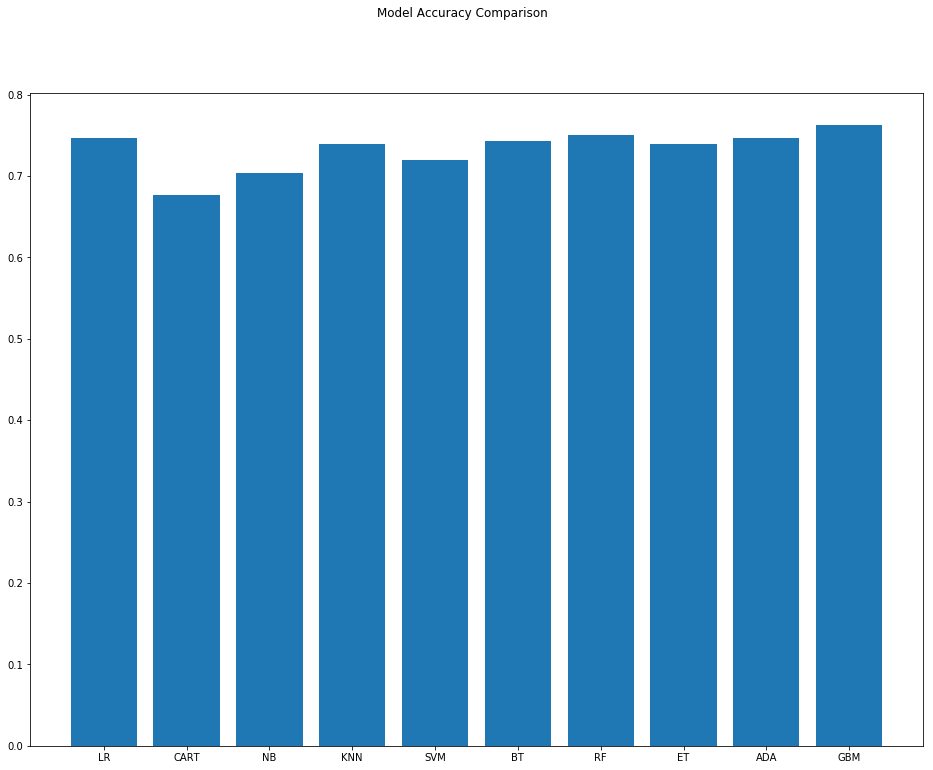

In [37]:
fig = pyplot.figure()
fig.suptitle('Model Accuracy Comparison')
pyplot.bar(names, results)
pyplot.show()

### 5.b) Compare the cost of models

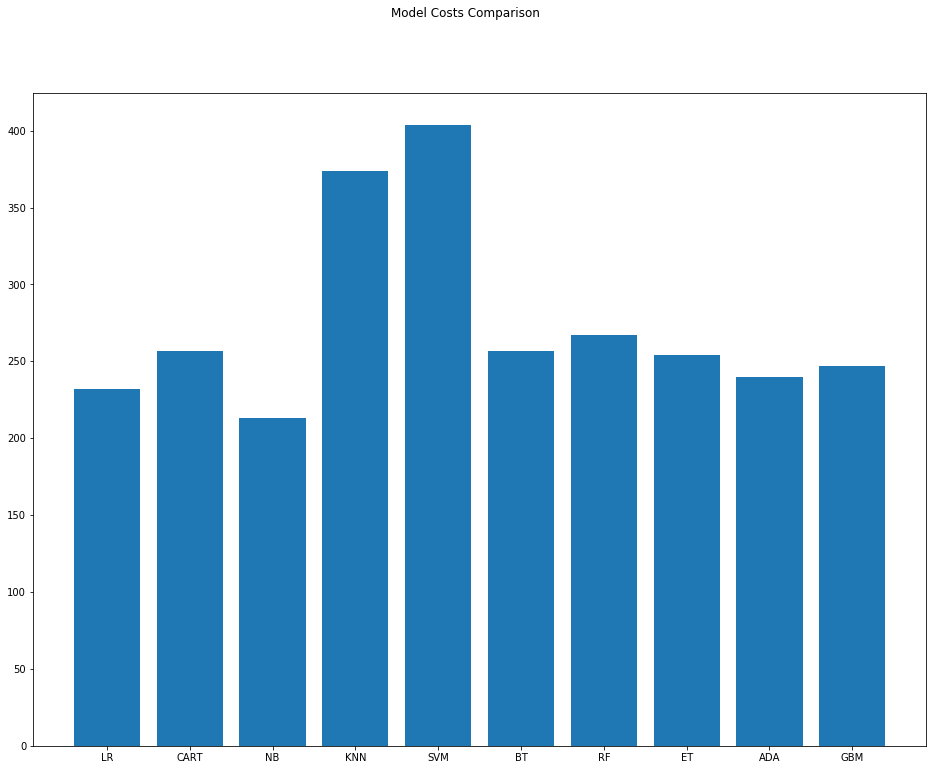

In [38]:
fig = pyplot.figure()
fig.suptitle('Model Costs Comparison')
pyplot.bar(names, costs)
pyplot.show()

### 5.c) Plot the cost vs. accuracy of models

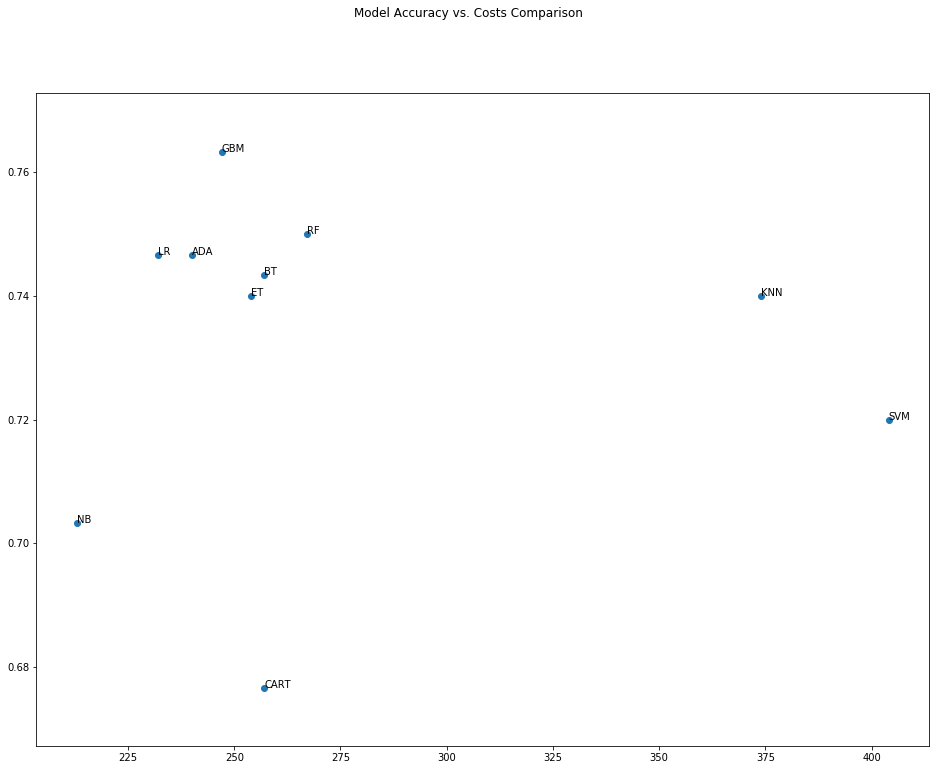

In [39]:
fig, ax = pyplot.subplots()
fig.suptitle('Model Accuracy vs. Costs Comparison')
ax.scatter(costs, results)
for i, txt in enumerate(names):
    ax.annotate(txt, (costs[i], results[i]))
pyplot.show()

In [40]:
print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:00:37.898250
